### Randomized matrix multiplication
(a)

In [4]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import math
import random
np.random.seed(243)

In [24]:
# import data
A = pd.read_csv (r'STA243_homework_1_matrix_A.csv',header = None) 
B = pd.read_csv (r'STA243_homework_1_matrix_B.csv',header = None)
# convert dataframe to matrix
A = A.to_numpy()
B = B.to_numpy()

In [159]:
#function to carry out random matrix multiplication

def RMM(A,B,r):                             
    n = A.shape[1]     
    prob = np.repeat(0, n)
    for i in range(n):
        prob[i]= LA.norm(A[:,i])*LA.norm(B[i,:])    ##produce pk's
    S = 0
    for i in range(r):
        l = random.choices(range(n),k=1,weights=prob) #sample with replacement and prob
        S = S + np.outer(A[:,l],B[l,:])/(prob[l]/sum(prob))
    return(S/r)

(b)

In [160]:
c1 = RMM(A, B, 20)
c2 = RMM(A, B, 50)
c3 = RMM(A, B, 100)
c4 = RMM(A, B, 200)

(c)

In [161]:
c_true = np.dot(A,B)
A_norm = LA.norm(A)
B_norm = LA.norm(B)
error = LA.norm(c1-c_true)/(A_norm*B_norm)
error

0.15766049650811503

In [162]:
error = LA.norm(c2-c_true)/(A_norm*B_norm)
error

0.09898615661210057

In [163]:
error = LA.norm(c3-c_true)/(A_norm*B_norm)
error

0.08762680043552658

In [164]:
error = LA.norm(c4-c_true)/(A_norm*B_norm)
error

0.07156752546360595

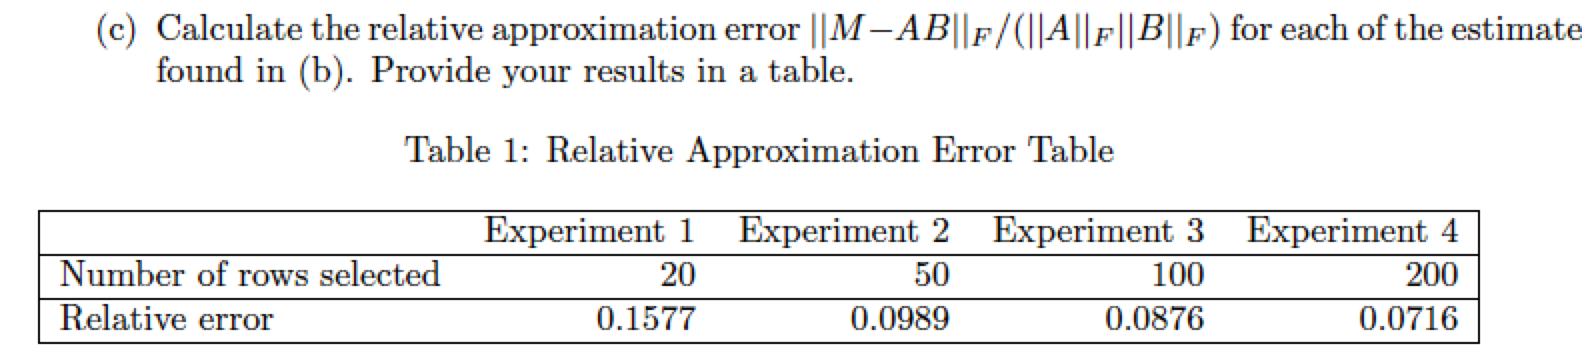

(d)

Text(0.5, 1.0, 'r = 200')

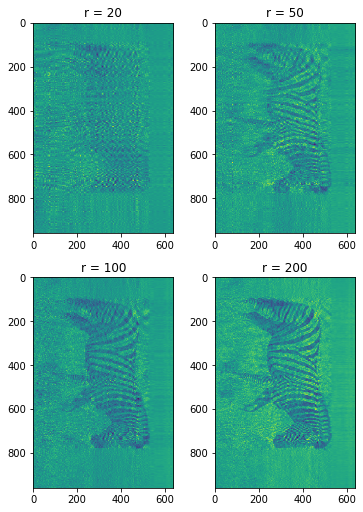

In [198]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2,constrained_layout=True,figsize=(5, 7))
ax1.imshow(c1)
ax2.imshow(c2)
ax3.imshow(c3)
ax4.imshow(c4)
# separate subplot titles
ax1.set_title('r = 20')
ax2.set_title('r = 50')
ax3.set_title('r = 100')
ax4.set_title('r = 200')

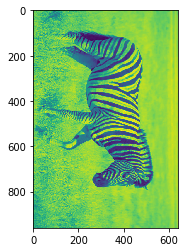

In [187]:
import scipy
import matplotlib.pyplot as plt
plt.imshow(c_true)
plt.show()

### Power method

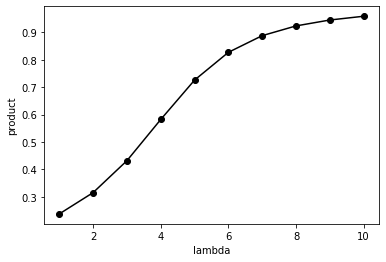

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math

def power_iteration(A, v0, eps = 1e-6, maxiter=100):
  for i in range(maxiter):
    v = v0
    v0 = np.dot(A, v0)
    v0 = v0/(np.linalg.norm(v0))
    if np.linalg.norm(v0-v) < eps:
        break
  return(v0)

if __name__ == '__main__':

    np.random.seed(2022)
    E = np.random.normal(size=(10,10))
    v = np.array([1]+[0]*9)
    lams = np.arange(1, 11)
    prods = []
    for lam in lams:
        X = lam*np.outer(v,v) + E
        v0 = np.ones(10)
        v0 = v0/np.linalg.norm(v0,2)
        vv = power_iteration(X, v0)
        prods.append(np.abs(v @ vv))
    
    plt.plot(lams, prods, '-ok')
    plt.xlabel('lambda')
    plt.ylabel('product')
    plt.show()


### Sketching for Least-squares
(a)

In [8]:
import time
import numpy as np
import pandas as pd
from numpy import linalg
from scipy.linalg import hadamard
import random
import math
from numba import jit

random.seed(243)

@jit(nopython=True)
def fwht(a) -> None:
    """In-place Fast Walsh–Hadamard Transform of array a."""
    h = 1
    while h < len(a):
        for i in range(0, len(a), h * 2):
            for j in range(i, i + h):
                x = a[j]
                y = a[j + h]
                a[j] = x + y
                a[j + h] = x - y
        h *= 2

def Sketched_OLS_time(X, y, eps):
    n = X.shape[0]
    d = X.shape[1]
    r = d * math.log(n)/0.1
    S = random.choices(range(n), k=int(r), weights=np.repeat(1, n))
    D = random.choices([-1, 1],k=n,weights=[1, 1])
    
    """calculate DX"""
    DX = np.zeros((n, d))
    for i in range(d):
        DX[:, i] = np.multiply(D, X[:, i])
    
    """calculate DY"""
    Dy = np.zeros((n, 1))
    Dy[:,0] = np.multiply(D, y[:, 0])
    
    """calculate HDX and HDy"""
    fwht(DX)
    fwht(Dy)
    
    """calculate X_star and y_star"""
    X_star = np.zeros((int(r), d))
    y_star = np.zeros((int(r), 1))
    for j in range(d):
        for i in range(int(r)):
            X_star[i, j] = math.sqrt(n/r) * DX[S[i],j]
    for i in range(int(r)):
        y_star[i] = math.sqrt(n/r) * Dy[S[i]]

    """get the running time"""
    start_time = time.time()
    M = np.dot(np.dot(np.linalg.inv(np.dot(X_star.T, X_star)), X_star.T), y_star)
    T = time.time() - start_time
    
    return(T)

X = np.random.uniform(low=0, high=1, size=(2**20,20))
y = np.random.uniform(low=0, high=1, size=(2**20,1))

e = np.array([0.1, 0.05, 0.01, 0.001])
for eps in e:
    print(Sketched_OLS_time(X, y, eps))

0.0005991458892822266
0.00034618377685546875
0.0003299713134765625
0.0003898143768310547


In [2]:
"""OLS running time"""
start_time = time.time()
N = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
T = time.time() - start_time
print(T)

0.1496870517730713
